In [2]:
import control as ct
import numpy as np
import scipy as sp  
import matplotlib.pyplot as plt
import sysid_pem as sid




   z - 0.4
-------------
z^2 - z + 0.5

dt = 0.01


z - 0.7
-------
z - 0.9

dt = 0.01



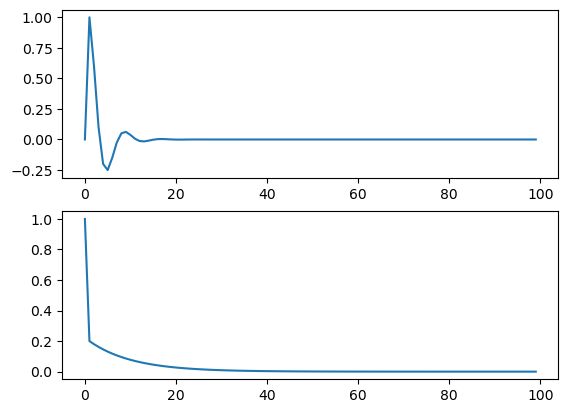

In [3]:
N = 1001
t = np.linspace(0,10,N)
t = t[0:-1]
N = 1000
Ts = t[1]-t[0]

A0 = np.array([1, -1, 0.5])
B0 = np.array([1, -0.4])
G0 = ct.tf(B0, A0, Ts)
print(G0)



C0 = np.array([1, -0.7])
D0 = np.array([1, -0.9])
H0 = ct.tf(C0, D0,Ts)
print(H0)


tt0, g0 = ct.impulse_response(G0,T=t[0:100])
G0_mag, G0_phase, omega2 = ct.bode_plot(G0,plot=False)

tth,h0 = ct.impulse_response(H0,T=t[0:100])

fig, ax = plt.subplots(2,1)
ax[0].plot(g0*Ts)
ax[1].plot(h0*Ts)




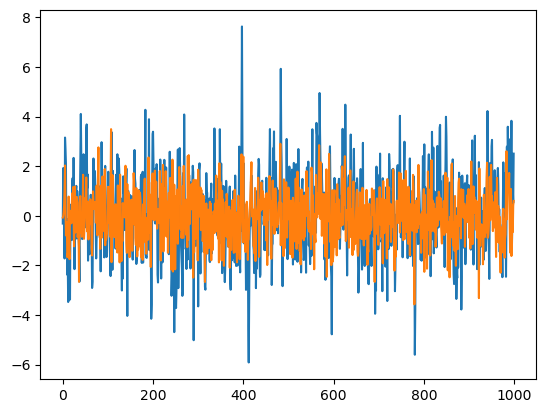

In [4]:
# input 1
r = np.random.randn(N)
e = np.random.randn(N)

tt, v = ct.forced_response(H0,T=t,U=e)
tt, y = ct.forced_response(G0,T=t,U=r)
y = y + v

fig,ax = plt.subplots(1)
ax.plot(y)
ax.plot(r)


In [13]:
m = 20
nb = m
na = m
nk = 1
n_arx = [na, nb, nk]

ng = nb
nh = na

theta = sid.V_arx_lin_reg(n_arx,y,r)

A = -theta[0:na]
B = theta[na:nb+na]

rB = np.concatenate(([B[0]], np.zeros(na-1)))
cB = B
    
rA = np.concatenate(([1], np.zeros(na-1)))
cA = np.concatenate(([1], -A[0:na-1]))

CB = sp.linalg.toeplitz(cB,r=rB)
CA = sp.linalg.toeplitz(cA,r=rA)
    
M = np.block([[np.zeros((na,nb)), CA], [np.eye(nb), -CB]])
    
theta_gh = np.linalg.inv( M.T @ M ) @ (M.T @ np.concatenate((A, B)))

g = np.concatenate((np.zeros(nk), theta_gh[0:ng]))
h = np.concatenate(([1], theta_gh[ng:ng+nh]))



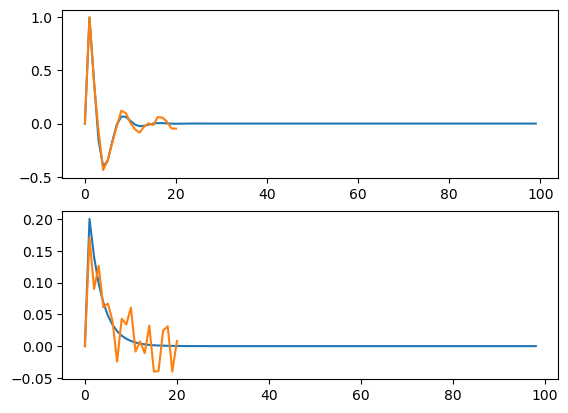

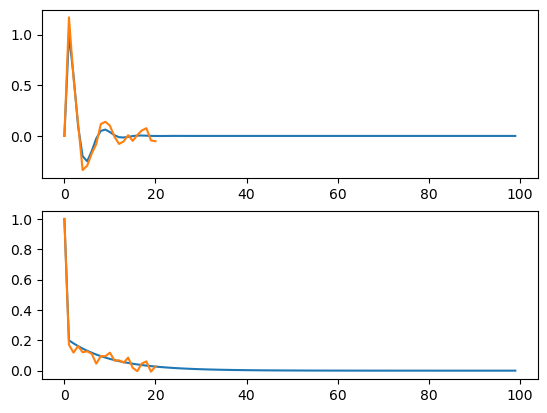

In [14]:
fig,ax = plt.subplots(2,1)
tt,hig = ct.impulse_response(G0/H0,T=t[0:100])
tt,hi = ct.impulse_response(1/H0,T=t[0:100])
ax[0].plot(hig*Ts)
ax[0].plot(np.concatenate((np.zeros(nk),B)))
ax[1].plot(np.concatenate((np.zeros(1),-hi[1:-1]*Ts)))
ax[1].plot(np.concatenate((np.zeros(1),A)))

fig,ax = plt.subplots(2,1)
ax[0].plot(g0*Ts)
ax[0].plot(g)
ax[1].plot(h0*Ts)
ax[1].plot(h)

In [42]:
na = 2
nb = 2
Cg = np.array(sp.linalg.toeplitz(np.concatenate(([0],g[nk:nk+ng-1])),r=np.zeros(na)))
Meye = np.concatenate((np.eye(nb), np.zeros((ng-nb,nb))),axis=0)
M = np.concatenate((Meye,-Cg),axis=1)
thetaBA = np.linalg.inv( M.T @ M ) @ (M.T @ g[nk:ng+nk] )

Gest = ct.tf(thetaBA[0:nb], np.concatenate(([1],thetaBA[nb:nb+na])),Ts)
print(thetaBA)
print(G0)
print(Gest)

[ 1.17026939 -0.51967274 -0.93263976  0.42816491]

   z - 0.4
-------------
z^2 - z + 0.5

dt = 0.01


    1.17 z - 0.5197
-----------------------
z^2 - 0.9326 z + 0.4282

dt = 0.01



In [55]:
nc = 1
nd = 1
Ch = np.array(sp.linalg.toeplitz(h[0:nh],r=np.concatenate(([1],np.zeros(nd-1)))))
Meye = np.concatenate((np.eye(nc), np.zeros((nh-nc,nc))),axis=0)
M = np.concatenate((Meye,-Ch),axis=1)
thetaCD = np.linalg.inv( M.T @ M ) @ (M.T @ h[1:nh+1] )

Hest = ct.tf(np.concatenate(([1],thetaCD[0:nc])), np.concatenate(([1],thetaCD[nc:nc+nd])),Ts)
print(thetaCD)
print(H0)
print(Hest)

[-0.65717646 -0.82765983]

z - 0.7
-------
z - 0.9

dt = 0.01


z - 0.6572
----------
z - 0.8277

dt = 0.01



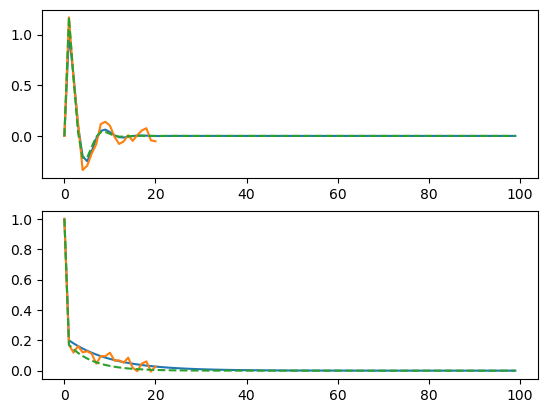

In [57]:
tt,g_est = ct.impulse_response(Gest,T=t[0:100])
tt,h_est = ct.impulse_response(Hest,T=t[0:100])

fig,ax = plt.subplots(2,1)
ax[0].plot(g0*Ts)
ax[0].plot(g)
ax[0].plot(g_est*Ts,'--')

ax[1].plot(h0*Ts)
ax[1].plot(h)
ax[1].plot(h_est*Ts,'--')

In [15]:
A11 = np.zeros((na,nb))
A12 = CA
A21 = np.eye(nb)
A22 = -CB

print(A11.shape)
print(A12.shape)
print(A21.shape)
print(A22.shape)

M = np.block([[np.zeros((na,nb)), CA], [np.eye(nb), -CB]])

(20, 20)
(20, 20)
(20, 20)
(20, 20)


In [4]:
m = 10
nb = m
na = m
nk = 1

n_arx = [nf, nb, nk]
theta_arx = sid.V_high_order_arx(n_arx,y,r)


[-1.73984375e+01  3.39689941e+01  3.10229492e+00  1.38378906e+00
  3.36831055e+01  3.33250732e+01  7.29052734e+00  3.26601562e+01
  8.43380127e+01  4.54541016e+01 -2.28964844e+01  3.38841632e+01
  1.35873470e+01  5.40462808e+00  2.11989891e+00  9.19821043e-01
  3.44497344e-01  1.29613289e-01  3.61155508e-02 -1.65263672e+01
  2.35280762e+01  2.16160889e+01  9.78588867e+00  3.20888672e+01
  4.72142334e+01  2.50231934e+01  3.12031250e+01  8.99287109e+01
  8.60561523e+01]
[-1.73984375e+01  3.39689941e+01  3.10229492e+00  1.38378906e+00
  3.36831055e+01  3.33250732e+01  7.29052734e+00  3.26601562e+01
  8.43380127e+01  4.54541016e+01 -2.28964844e+01  3.38841632e+01
  1.35873470e+01  5.40462808e+00  2.11989891e+00  9.19821043e-01
  3.44497344e-01  1.29613289e-01  3.61155508e-02]
[  1.         -16.52636719  23.52807617  21.61608887   9.78588867
  32.08886719  47.2142334   25.02319336  31.203125    89.92871094
  86.05615234]
[[  1.           0.           0.           0.           0.
    0.     

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 20)

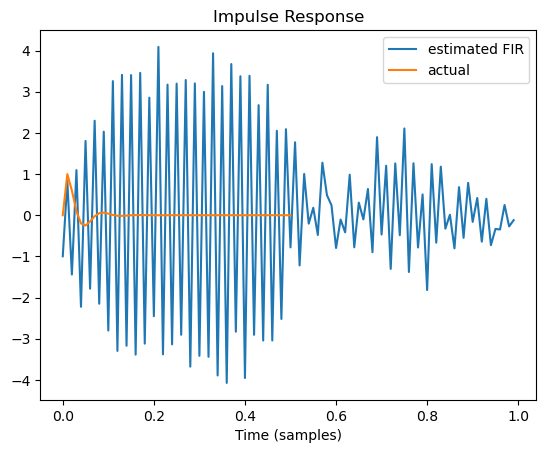

In [9]:
tt1 = np.linspace(0,m*Ts-Ts,m)
fig,ax = plt.subplots(1)
ax.plot(tt1,theta_arx[0:nb],label='estimated FIR')
ax.plot(tt0,g0/100,label='actual')
ax.set_title('Impulse Response')
ax.set_xlabel('Time (samples)')
ax.legend()

In [16]:
a = np.array([1, 2])
b = np.array([4, 5, 7])
c = np.convolve(b,a)
#print(a)
print(b)
#print(c)

rr = np.zeros(3)
rr[0] = b[0]

cc = np.concatenate((b, np.zeros(2)))
print(rr)
print(cc)
M = sp.linalg.toeplitz(cc, r=rr)

print(M)

[4 5 7]
[4. 0. 0.]
[4. 5. 7. 0. 0.]
[[4. 0. 0.]
 [5. 4. 0.]
 [7. 5. 4.]
 [0. 7. 5.]
 [0. 0. 7.]]
